In [1]:
# panda library to read csv file
import pandas as pd

# string library to use stopword dictionary
import string as string

# numpy for stronger caculate
import numpy as np


# nltk library to lemmatize or stemming word
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

#download all the necessary resource
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

#re library to filter the text
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:

 from google.colab import files
 uploaded=files.upload()

Saving data.xlsx to data.xlsx


In [4]:
df=pd.read_excel("data.xlsx")
df.shape

(1133, 4)

In [5]:
listLabel=(list(df['Category'].drop_duplicates()))

In [6]:
tags=["a","abbr","acronym","address","area","b","base","bdo","big","blockquote","body","br","button","caption","cite","code","col","colgroup","dd","del","dfn","div","dl","DOCTYPE","dt","em","fieldset","form","h1","h2","h3","h4","h5","h6","head","html","hr","i","img","input","ins","kbd","label","legend","li","link","map","meta","noscript","object","ol","optgroup","option","p","param","pre","q","samp","script","select","small","span","strong","style","sub","sup","table","tbody","td","textarea","tfoot","th","thead","title","tr","tt","ul","var"]
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer
def pre_process(text):
    #lower case all the text
    text_lower=str(text).lower()
    #remove all the url in the text
    text_no_link=re.sub(r"http\S+", "", text_lower)
    #remove all digit,punctuation,... and only keep the alphabetic words
    text_clean=re.sub(r'[^a-z]', ' ', text_no_link)
    #text_clean=re.sub(r'[^\w\s]', '', text_no_link)
    text_clean=" ".join(text_clean.split())
    #use stemmer to lemmatize the text
    stemmer = SnowballStemmer(language='english')
    #tokenize to make array of words
    words = word_tokenize(text_clean)
    words=[word for word in words if word not in tags]
    words=[word for word in words if len(word)>2]
    #remove all stop word such as a,he,she,many,...
    word_no_stop=[word for word in words if word not in stopwords.words('english')]
    #lemmatize all the text
    word_stem=[stemmer.stem(word) for word in word_no_stop]
    return " ".join(word_stem)

In [7]:
df["clean_text"]=df["content"].apply(pre_process)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#tfidf = TfidfVectorizer(sublinear_tf=True,min_df=2)
#tfidf = TfidfVectorizer(use_idf=False,min_df=5,max_features = 1500)
#vectorizer =CountVectorizer(min_df=0.01,max_df=0.85,max_features = 1500)
vectorizer =TfidfVectorizer(min_df=0.01,max_df=0.85,max_features = 1500,ngram_range=(1,3))
feat = vectorizer.fit_transform(df.clean_text)
vectorizer.get_feature_names_out()

array(['abl', 'absolut', 'academ', ..., 'zealand', 'zone', 'zoom'],
      dtype=object)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


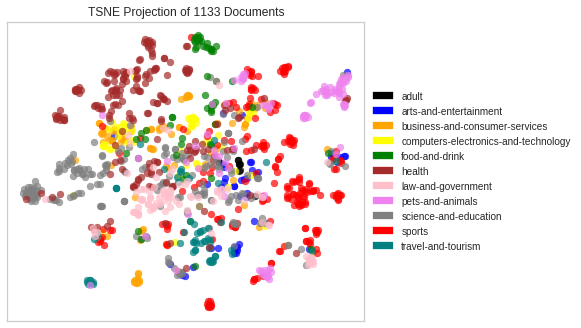

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer(min_df=0.01,max_df=0.85,max_features = 1500,ngram_range=(1,3))
docs = tfidf.fit_transform(df.clean_text)
labels = df.Category

# Instantiate the text visualizer
tsne = TSNEVisualizer(colors=["black","blue","orange","yellow","green","brown","pink","violet","gray","red","teal"])
tsne.fit(docs, labels)
tsne.show()

In [10]:
X = pd.DataFrame(feat.toarray(), columns = vectorizer.get_feature_names_out())
print(X)

      abl   absolut  academ    accept    access  accessori  accommod  \
0     0.0  0.041256     0.0  0.000000  0.005073        0.0       0.0   
1     0.0  0.000000     0.0  0.000000  0.126981        0.0       0.0   
2     0.0  0.000000     0.0  0.005788  0.000000        0.0       0.0   
3     0.0  0.000000     0.0  0.000000  0.000000        0.0       0.0   
4     0.0  0.000000     0.0  0.000000  0.061878        0.0       0.0   
...   ...       ...     ...       ...       ...        ...       ...   
1128  0.0  0.000000     0.0  0.000000  0.000000        0.0       0.0   
1129  0.0  0.000000     0.0  0.000000  0.039457        0.0       0.0   
1130  0.0  0.000000     0.0  0.000000  0.000000        0.0       0.0   
1131  0.0  0.000000     0.0  0.000000  0.000000        0.0       0.0   
1132  0.0  0.000000     0.0  0.000000  0.018067        0.0       0.0   

       account    achiev    across  ...  written      year  year old  yes  \
0     0.000000  0.000000  0.000000  ...      0.0  0.004757

In [11]:
y=df.Category

In [12]:
for classname in listLabel:
  df_class = df[df["Category"] == classname]
  print(classname)
  df_docs_terms_class = X.iloc[df_class.index]
  print(df_docs_terms_class.sum(axis=0).nlargest(n=10))
  


adult
sex      1.858440
cam      1.851063
video    1.454949
girl     1.405302
chat     1.160960
age      1.100956
model    1.003695
view     0.919897
live     0.917792
game     0.839435
dtype: float64
arts-and-entertainment
music       3.103791
ago         3.055559
book        2.927371
ticket      2.869684
theatr      2.807160
movi        2.794653
anim        2.723230
hour ago    2.529528
news        2.468190
star        2.321926
dtype: float64
business-and-consumer-services
properti    5.906018
busi        5.288318
servic      5.211799
custom      5.113209
move        4.581143
market      4.571367
product     4.257752
sale        4.084681
card        3.671792
rent        3.460990
dtype: float64
computers-electronics-and-technology
broadband    4.348873
plan         3.810083
secur        3.169848
phone        3.156604
product      3.108034
servic       2.947727
cloud        2.895447
mobil        2.821900
busi         2.788674
devic        2.714414
dtype: float64
sports
bike       10.20

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, 
                                     test_size = 0.3, 
                                     random_state = 0,
                                     stratify=df.Category
                                    )

In [14]:
y_train.value_counts()

sports                                  152
science-and-education                   144
health                                  141
pets-and-animals                         67
business-and-consumer-services           66
law-and-government                       62
travel-and-tourism                       43
computers-electronics-and-technology     41
food-and-drink                           38
arts-and-entertainment                   32
adult                                     7
Name: Category, dtype: int64

In [15]:
sortLabel=["sports","science-and-education","health ","pets-and-animals","business-and-consumer-services","law-and-government","travel-and-tourism","computers-electronics-and-technology","food-and-drink","arts-and-entertainment","adult"]

(793, 1500)


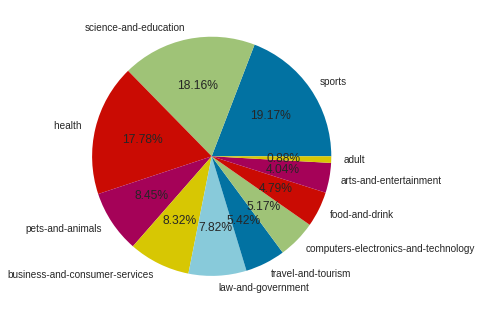

In [16]:
plt.pie(y_train.value_counts(), labels = sortLabel,autopct='%.2f%%')
plt.show
print(X_train.shape)


In [17]:
y_test.value_counts()

sports                                  65
science-and-education                   62
health                                  60
pets-and-animals                        29
business-and-consumer-services          28
law-and-government                      27
travel-and-tourism                      18
computers-electronics-and-technology    18
food-and-drink                          17
arts-and-entertainment                  13
adult                                    3
Name: Category, dtype: int64

(340, 1500)


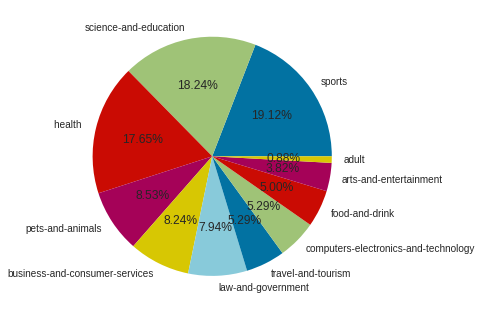

In [18]:
plt.pie(y_test.value_counts(), labels = sortLabel,autopct='%.2f%%')
plt.show
print(X_test.shape)


In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.1)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score ,f1_score,classification_report
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy check

print('Train accuracy:', round(accuracy_score(y_train, y_train_pred),2))
print('Test accuracy:', round(accuracy_score(y_test, y_test_pred),2))
print(classification_report(y_train, y_train_pred))


Train accuracy: 0.93
Test accuracy: 0.77
                                      precision    recall  f1-score   support

                               adult       1.00      1.00      1.00         7
              arts-and-entertainment       0.91      0.91      0.91        32
      business-and-consumer-services       0.91      0.95      0.93        66
computers-electronics-and-technology       0.97      0.90      0.94        41
                      food-and-drink       0.97      0.89      0.93        38
                              health       0.94      0.96      0.95       141
                  law-and-government       0.94      0.94      0.94        62
                    pets-and-animals       0.92      0.82      0.87        67
               science-and-education       0.90      0.94      0.92       144
                              sports       0.95      0.95      0.95       152
                  travel-and-tourism       0.89      0.91      0.90        43

                     

In [21]:
print(classification_report(y_test, y_test_pred))

                                      precision    recall  f1-score   support

                               adult       1.00      0.67      0.80         3
              arts-and-entertainment       0.50      0.38      0.43        13
      business-and-consumer-services       0.65      0.61      0.63        28
computers-electronics-and-technology       0.67      0.78      0.72        18
                      food-and-drink       0.86      0.71      0.77        17
                              health       0.86      0.90      0.88        60
                  law-and-government       0.73      0.70      0.72        27
                    pets-and-animals       0.78      0.62      0.69        29
               science-and-education       0.73      0.74      0.74        62
                              sports       0.80      0.91      0.85        65
                  travel-and-tourism       0.83      0.83      0.83        18

                            accuracy                          

In [22]:
df_test_pred = pd.concat([ pd.DataFrame(np.array(y_test), columns= ['test']), pd.DataFrame(y_test_pred, columns= ['pred'])], axis=1)

df_wrong= df_test_pred[df_test_pred['test'] != df_test_pred['pred']]
print(df_wrong)

                                     test                            pred
7                                  sports  business-and-consumer-services
8                   science-and-education              law-and-government
12                  science-and-education                  food-and-drink
20                  science-and-education          arts-and-entertainment
21                                 sports           science-and-education
..                                    ...                             ...
308                      pets-and-animals                          sports
313                arts-and-entertainment                          sports
316        business-and-consumer-services                          sports
325  computers-electronics-and-technology          arts-and-entertainment
328        business-and-consumer-services           science-and-education

[79 rows x 2 columns]


[[  7   0   0   0   0   0   0   0   0   0   0]
 [  0  29   0   0   0   1   0   0   2   0   0]
 [  0   0  63   0   0   0   1   0   1   1   0]
 [  0   1   1  37   0   1   0   0   1   0   0]
 [  0   0   2   0  34   1   0   0   0   0   1]
 [  0   0   0   0   0 135   0   1   4   0   1]
 [  0   1   1   0   0   0  58   0   1   0   1]
 [  0   1   0   1   0   2   1  55   2   4   1]
 [  0   0   1   0   0   1   2   3 135   2   0]
 [  0   0   1   0   1   0   0   1   3 145   1]
 [  0   0   0   0   0   2   0   0   1   1  39]]


Text(292.20000000000016, 0.5, 'predicted label')

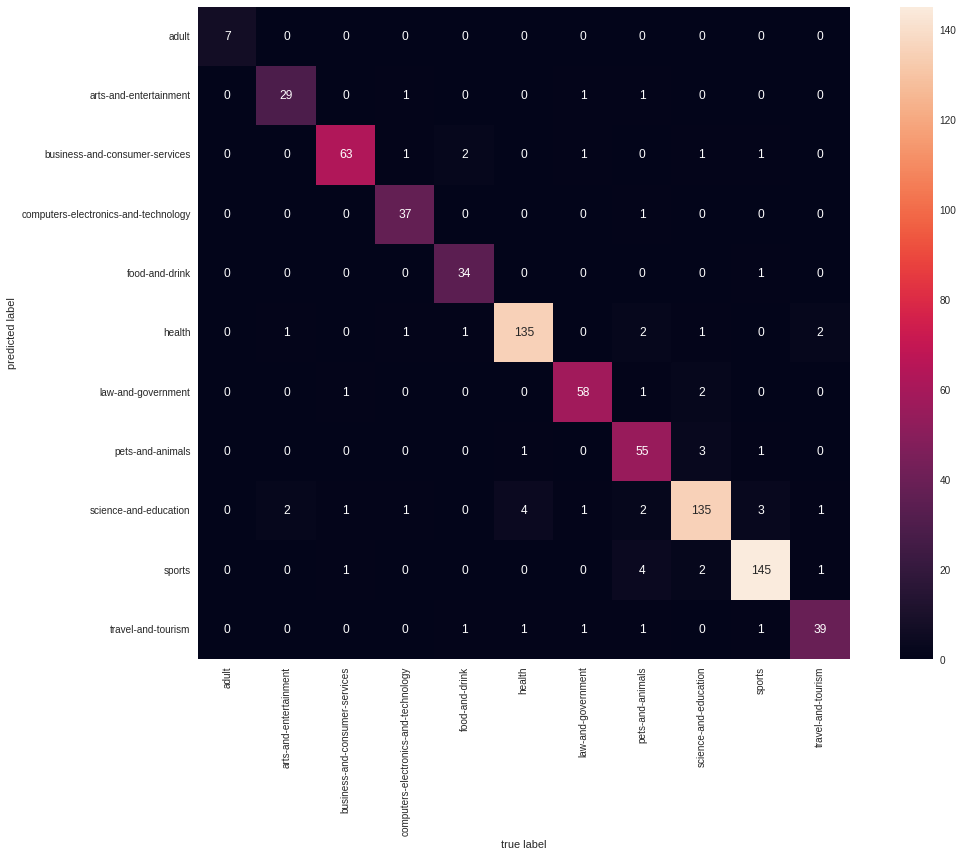

In [23]:
import seaborn as sns
mat=confusion_matrix(y_train,model.predict(X_train))
print(mat)
plt.figure(figsize=(18,12))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(listLabel),
            yticklabels=np.unique(listLabel)
           )
plt.xlabel('true label')
plt.ylabel('predicted label')

[[ 2  0  0  0  0  0  0  0  0  1  0]
 [ 0  5  1  2  0  0  0  1  1  3  0]
 [ 0  0 17  2  0  0  0  2  5  2  0]
 [ 0  1  0 14  0  1  0  0  2  0  0]
 [ 0  0  3  0 12  1  0  0  0  0  1]
 [ 0  0  2  0  0 54  1  1  2  0  0]
 [ 0  0  0  0  0  4 19  1  2  1  0]
 [ 0  1  0  0  1  1  0 18  2  6  0]
 [ 0  3  0  3  1  1  6  0 46  1  1]
 [ 0  0  1  0  0  1  0  0  3 59  1]
 [ 0  0  2  0  0  0  0  0  0  1 15]]


Text(292.20000000000016, 0.5, 'predicted label')

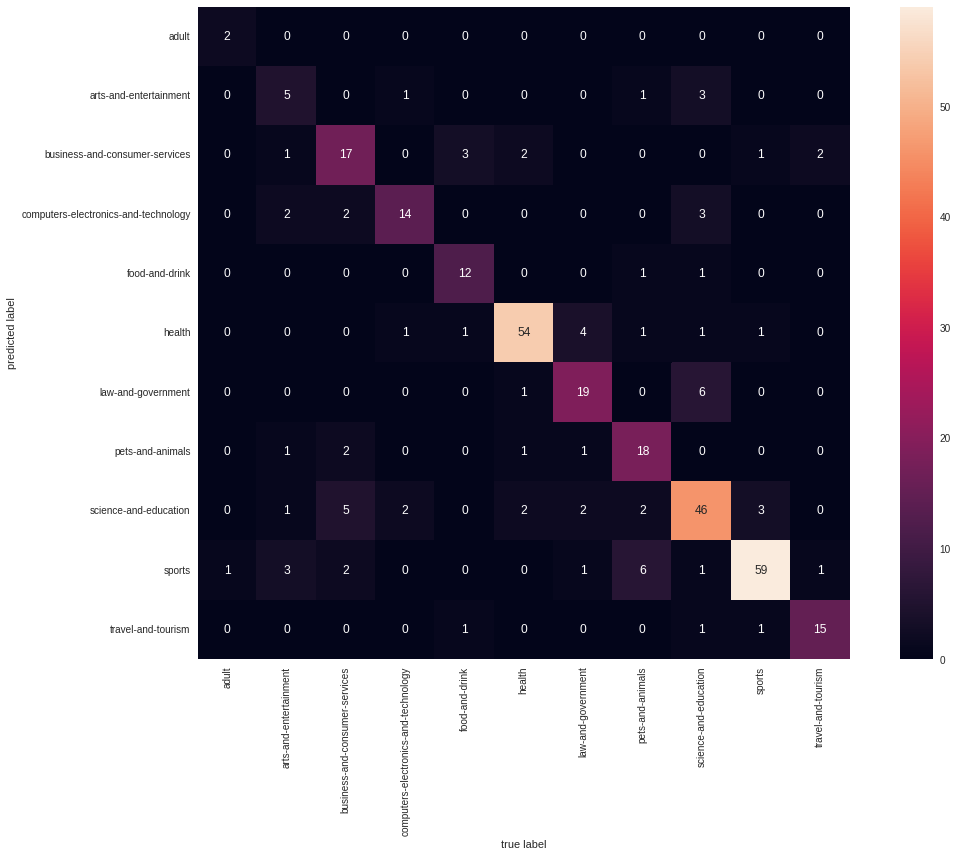

In [24]:
import seaborn as sns
mat=confusion_matrix(y_test,model.predict(X_test))
print(mat)
plt.figure(figsize=(18,12))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=np.unique(listLabel),
            yticklabels=np.unique(listLabel)
           )
plt.xlabel('true label')
plt.ylabel('predicted label')